Christian Basso

Lab 5: Linear Regression

Introduction to Data Science

November 6, 2023

# Lab 5: Regression

## Introduction
In a world of rising gas prices, potential car buyers are valuing fuel efficiency more than ever. Many aspects of a car impact its fuel efficency, including the number of cylinders, engine size, horsepower, weight. etc. In this lab, we will explore the relationship between these features and fuel effifency through linear regression. 

This dataset features continious, categorical, and binary features. We will explore how to handle these different types of features in the context of linear regression. Additionally, multiple models will be created to illustrate the importance of feature selection and standardization.

Before any analysis is done, I would guess that weight, diplacement, and number of cylinders will be most predictive of a cars miles per gallon (MPG), while quarter mile time, transmission type, and number of gears will be least predictive.

The model made in this program obtained an R^2 value of 0.88 and a RMSE of 2.15.

## Part 1: Loading and Transforming the Data

In [260]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

df = pd.read_csv("mtcars.csv")

df.head(10)


,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


Since transmission type and engine shape are binary, they will be converted to categorical variables.

In [261]:
df.astype({'Unnamed: 0': 'category'})
df.astype({'vs': 'category'})
df.astype({'am': 'category'})


,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  32 non-null     object 
 1   mpg         32 non-null     float64
 2   cyl         32 non-null     int64  
 3   disp        32 non-null     float64
 4   hp          32 non-null     int64  
 5   drat        32 non-null     float64
 6   wt          32 non-null     float64
 7   qsec        32 non-null     float64
 8   vs          32 non-null     int64  
 9   am          32 non-null     int64  
 10  gear        32 non-null     int64  
 11  carb        32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [263]:
df_data = df.describe()
df_data.head(100)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


Lets add a range for each variable.

In [264]:
range_row = df_data.apply(lambda x: x["max"] - x["min"])

df_data.loc["Range"] = range_row
df_data.head(100)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000
Range,23.500000,4.000000,400.900000,283.000000,2.170000,3.911000,8.400000,1.000000,1.000000,2.000000,7.0000


## Part 2: Characterizing the Variables

Each variable will but put into a histogram to see the distribution of the data.

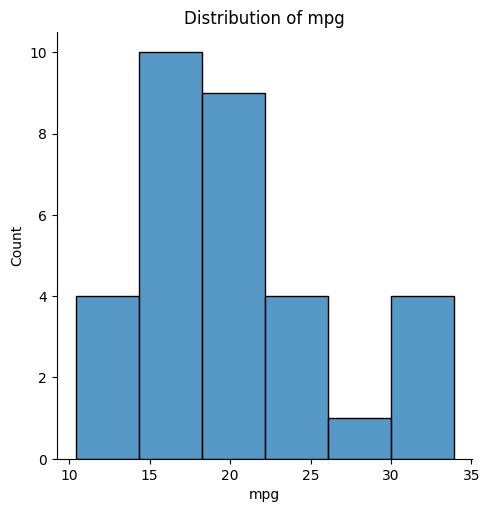

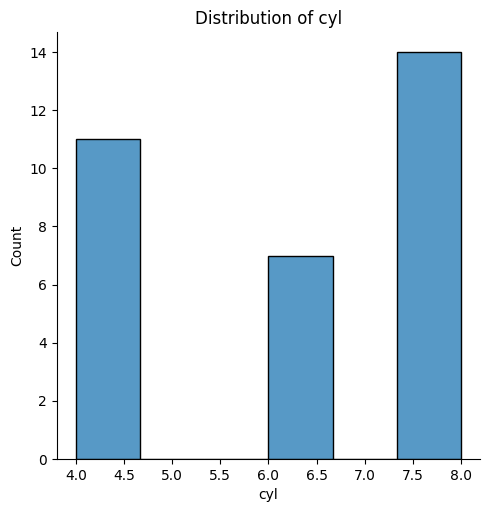

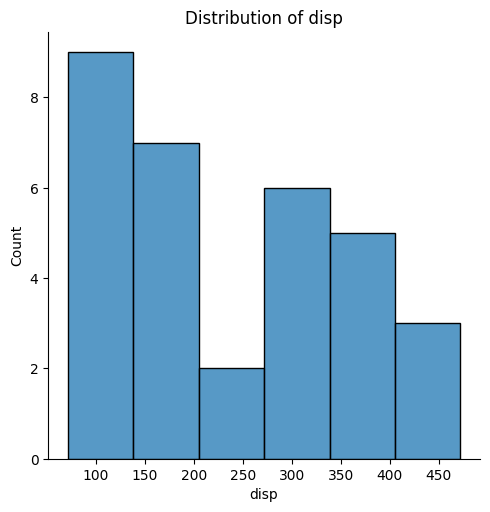

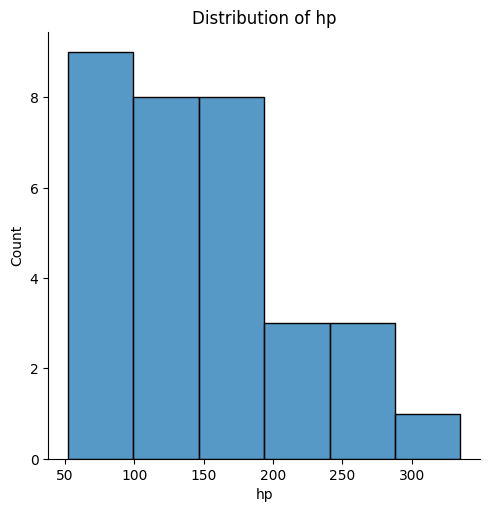

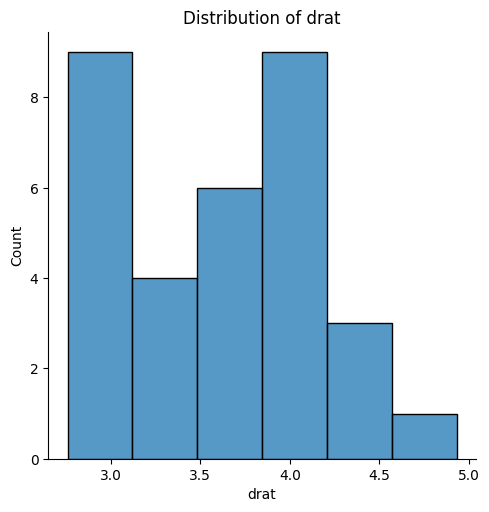

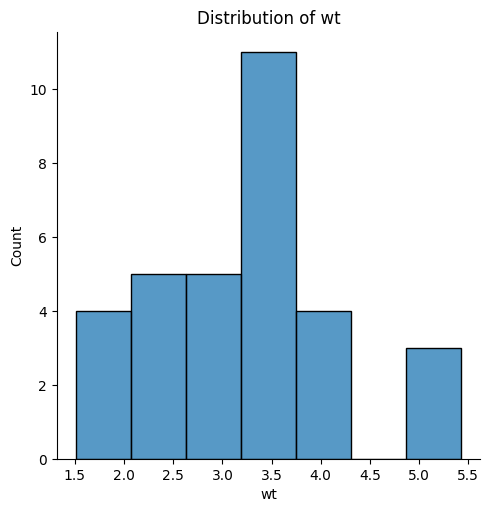

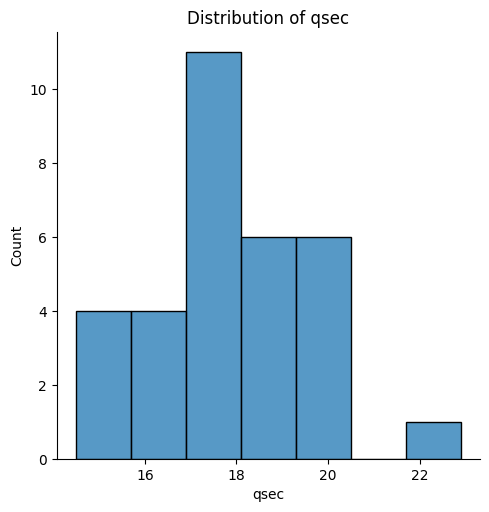

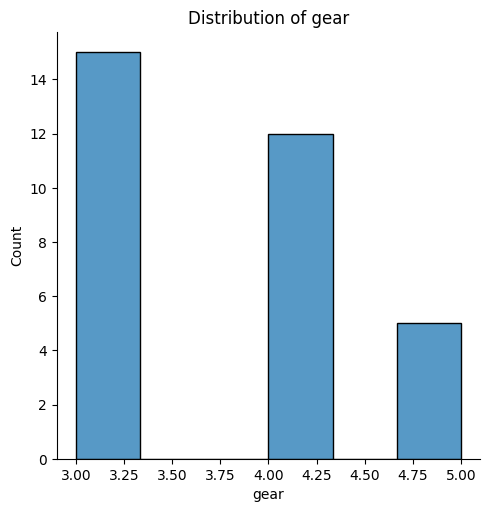

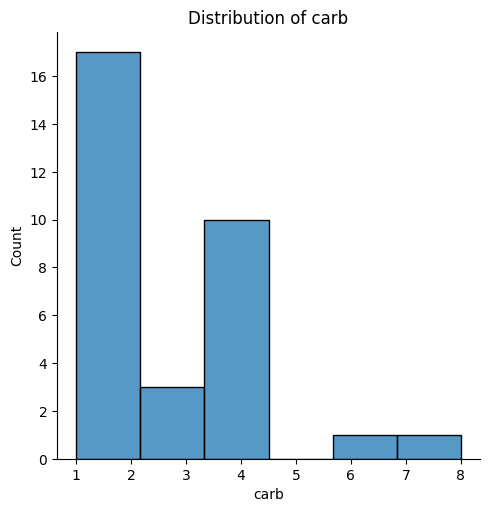

In [265]:
import warnings
warnings.filterwarnings('ignore')

for column in df.columns:
    if column != "Unnamed: 0" and column != "vs" and column != "am":
        sns.displot(df[column], kde=False)  
        plt.title(f'Distribution of {column}')
        plt.show()

<Axes: xlabel='vs', ylabel='count'>

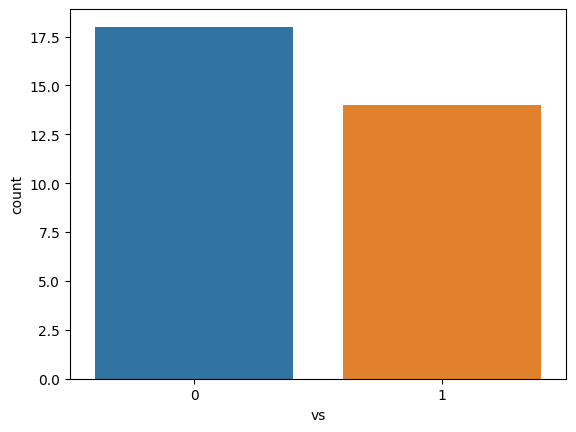

In [266]:
sns.countplot(x="vs", data=df)

<Axes: xlabel='am', ylabel='count'>

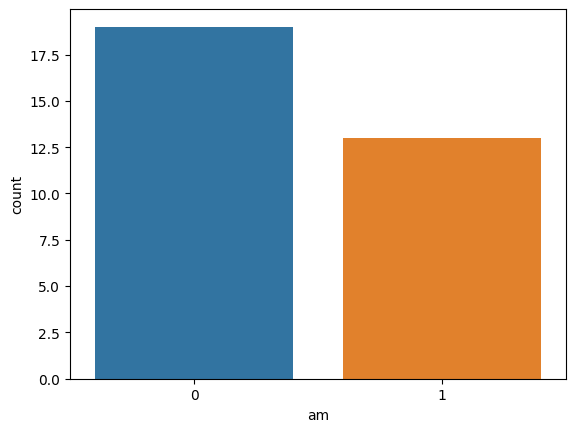

In [267]:
sns.countplot(x="am", data=df)

## Part 3: Exploring Relationships with MPG

This section will explore the relationship between MPG and the each variable. First, the variable will be plotted against mpg, then an appropriate statistcal test will be performed to determine if there is a significant relationship between the two variables. A significance level of 0.001 will be used.

A table will be made to keep the results of the statistical tests.

In [268]:
stat_table = pd.DataFrame(columns=['Variable', 'Pvalue', 'Stat Significant'])

#### Categorical Variables vs MPG
While they are not truley categorical, cyl, gear, and carb will be treated as such to best represent their relationships visually and statistically since they each have a limited amount of unique values. Each categorical variable will be visualized through box plots and will be statistacally tested using the kruskal-wallis test.

##### Cylinders vs MPG

Text(0.5, 1.0, 'Number of Cylinders vs MPG')

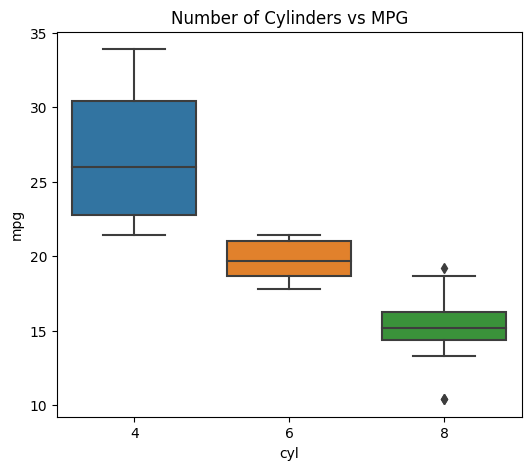

In [269]:
fig, axs = plt.subplots(figsize = (6,5))
sns.boxplot(x=df["cyl"], y=df["mpg"], ax = axs)
axs.set_xticklabels(axs.get_xticklabels())
plt.title("Number of Cylinders vs MPG")

In [270]:
samples_by_group = []
for value in set(df["cyl"].dropna()):
    mask = df["cyl"] == value
    samples_by_group.append(df["mpg"][mask])


stat, p = stats.kruskal(*samples_by_group, nan_policy='omit')

stat_table.loc[len(stat_table.index)] = ['cyl', p, p < 0.001] 
stat_table.head(5)

,Variable,Pvalue,Stat Significant
0,cyl,0.000003,True


##### Gear vs MPG

Text(0.5, 1.0, 'Number of Gears vs MPG')

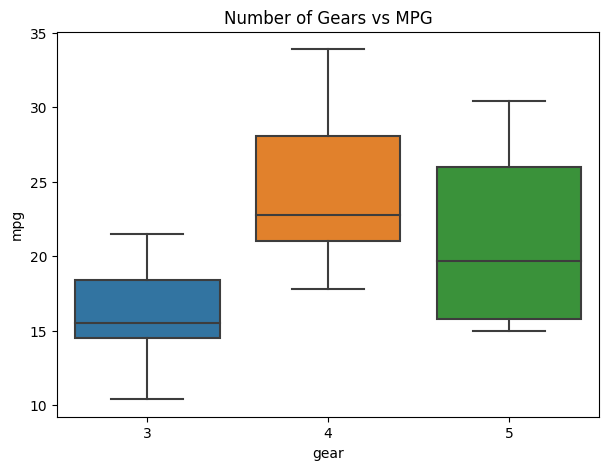

In [271]:
fig, axs = plt.subplots(figsize = (7,5))
sns.boxplot(x=df["gear"], y=df["mpg"], ax = axs)
axs.set_xticklabels(axs.get_xticklabels())
plt.title("Number of Gears vs MPG")

In [272]:
samples_by_group = []
for value in set(df["gear"].dropna()):
    mask = df["gear"] == value
    samples_by_group.append(df["mpg"][mask])


stat, p = stats.kruskal(*samples_by_group, nan_policy='omit')

stat_table.loc[len(stat_table.index)] = ['gear', p, p < 0.001] 
stat_table.head(5)

,Variable,Pvalue,Stat Significant
0,cyl,0.000003,True
1,gear,0.000776,True


##### Number of Carburetors vs MPG

Text(0.5, 1.0, 'Number of Carburetors vs MPG')

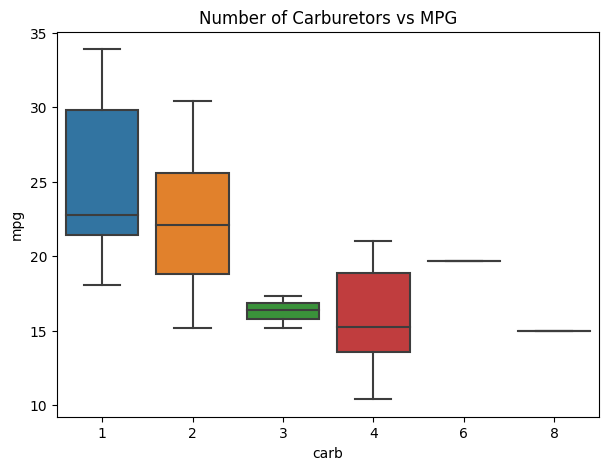

In [273]:
fig, axs = plt.subplots(figsize = (7,5))
sns.boxplot(x=df["carb"], y=df["mpg"], ax = axs)
axs.set_xticklabels(axs.get_xticklabels())
plt.title("Number of Carburetors vs MPG")

In [274]:
samples_by_group = []
for value in set(df["carb"].dropna()):
    mask = df["carb"] == value
    samples_by_group.append(df["mpg"][mask])


stat, p = stats.kruskal(*samples_by_group, nan_policy='omit')

stat_table.loc[len(stat_table.index)] = ['carb', p, p < 0.001] 
stat_table.head(5)

,Variable,Pvalue,Stat Significant
0,cyl,0.000003,True
1,gear,0.000776,True
2,carb,0.007013,False


##### Engine Shape vs MPG

Text(0.5, 1.0, 'Engine Shape vs MPG')

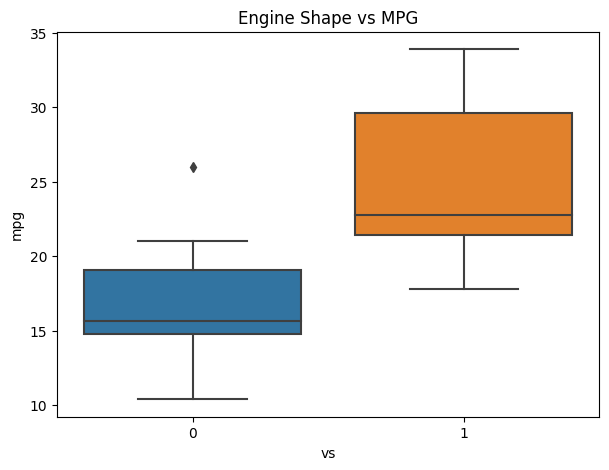

In [275]:
fig, axs = plt.subplots(figsize = (7,5))
sns.boxplot(x=df["vs"], y=df["mpg"], ax = axs)
axs.set_xticklabels(axs.get_xticklabels())
plt.title("Engine Shape vs MPG")

In [276]:
samples_by_group = []
for value in set(df["vs"].dropna()):
    mask = df["vs"] == value
    samples_by_group.append(df["mpg"][mask])


stat, p = stats.kruskal(*samples_by_group, nan_policy='omit')

stat_table.loc[len(stat_table.index)] = ['vs', p, p < 0.001] 
stat_table.head(5)

,Variable,Pvalue,Stat Significant
0,cyl,0.000003,True
1,gear,0.000776,True
2,carb,0.007013,False
3,vs,0.000083,True


##### Transmission Type vs MPG

Text(0.5, 1.0, 'Transmission Type vs MPG')

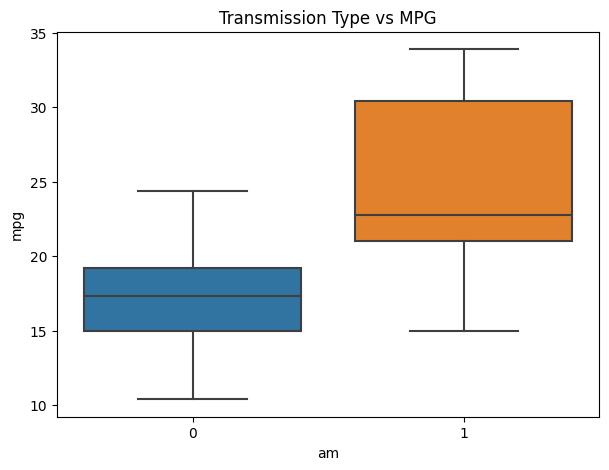

In [277]:
fig, axs = plt.subplots(figsize = (7,5))
sns.boxplot(x=df["am"], y=df["mpg"], ax = axs)
axs.set_xticklabels(axs.get_xticklabels())
plt.title("Transmission Type vs MPG")

In [278]:
samples_by_group = []
for value in set(df["am"].dropna()):
    mask = df["am"] == value
    samples_by_group.append(df["mpg"][mask])


stat, p = stats.kruskal(*samples_by_group, nan_policy='omit')

stat_table.loc[len(stat_table.index)] = ['am', p, p < 0.001] 
stat_table.head(5)

,Variable,Pvalue,Stat Significant
0,cyl,0.000003,True
1,gear,0.000776,True
2,carb,0.007013,False
3,vs,0.000083,True
4,am,0.001753,False


From each of the boxplots and the significance table, we can that number of cylinders, gears, and engine shape are predictive of MPG.

### Continuous variables vs MPG
Scatter plots and linear regressions will be used to show relationships between each continuous variable and MPG.

##### Displacement vs MPG

Text(0.5, 1.0, 'Displacement vs MPG')

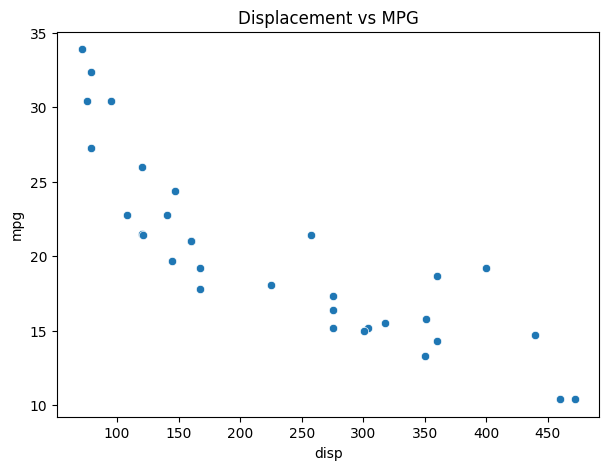

In [279]:
fig, axs = plt.subplots(figsize = (7,5))
sns.scatterplot(x=df["disp"], y=df["mpg"], ax = axs)
axs.set_xticklabels(axs.get_xticklabels())
plt.title("Displacement vs MPG")

In [280]:
slope, intercept, r, p, stderr = stats.linregress(df["mpg"], df["disp"])
stat_table.loc[len(stat_table.index)] = ['disp', p, p < 0.001] 
stat_table.head(100)

,Variable,Pvalue,Stat Significant
0,cyl,2.566217e-06,True
1,gear,7.757547e-04,True
2,carb,7.013126e-03,False
3,vs,8.348661e-05,True
4,am,1.753335e-03,False
5,disp,9.380327e-10,True


##### Horsepower vs MPG

,Variable,Pvalue,Stat Significant
0,cyl,2.566217e-06,True
1,gear,7.757547e-04,True
2,carb,7.013126e-03,False
3,vs,8.348661e-05,True
4,am,1.753335e-03,False
5,disp,9.380327e-10,True
6,hp,1.787835e-07,True


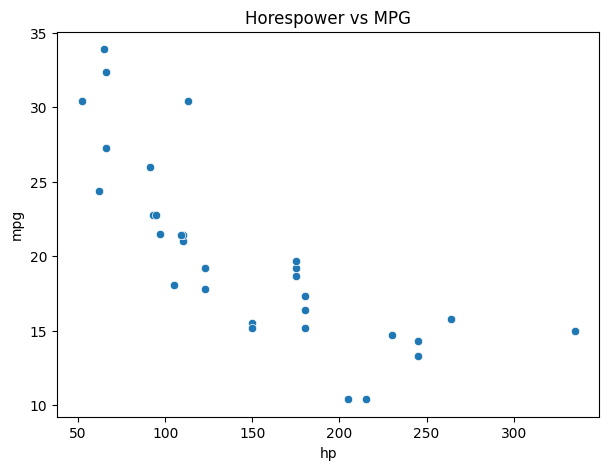

In [281]:
fig, axs = plt.subplots(figsize = (7,5))
sns.scatterplot(x=df["hp"], y=df["mpg"], ax = axs)
axs.set_xticklabels(axs.get_xticklabels())
plt.title("Horespower vs MPG")

slope, intercept, r, p, stderr = stats.linregress(df["mpg"], df["hp"])
stat_table.loc[len(stat_table.index)] = ['hp', p, p < 0.001] 
stat_table.head(100)

##### Rear Axle Ratio vs MPG

,Variable,Pvalue,Stat Significant
0,cyl,2.566217e-06,True
1,gear,7.757547e-04,True
2,carb,7.013126e-03,False
3,vs,8.348661e-05,True
4,am,1.753335e-03,False
5,disp,9.380327e-10,True
6,hp,1.787835e-07,True
7,drat,1.776240e-05,True


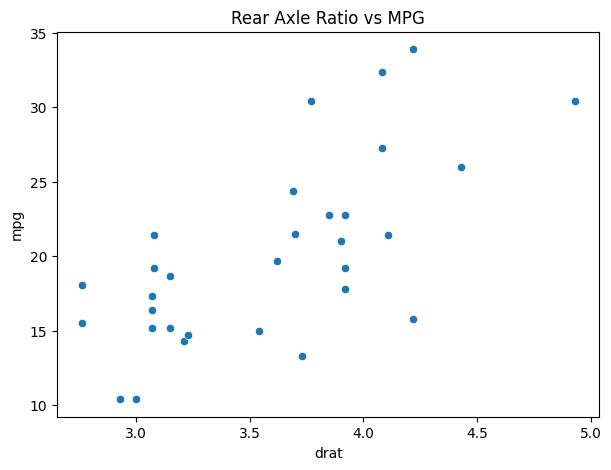

In [282]:
fig, axs = plt.subplots(figsize = (7,5))
sns.scatterplot(x=df["drat"], y=df["mpg"], ax = axs)
axs.set_xticklabels(axs.get_xticklabels())
plt.title("Rear Axle Ratio vs MPG")

slope, intercept, r, p, stderr = stats.linregress(df["mpg"], df["drat"])
stat_table.loc[len(stat_table.index)] = ['drat', p, p < 0.001] 
stat_table.head(100)

##### Weight vs MPG

,Variable,Pvalue,Stat Significant
0,cyl,2.566217e-06,True
1,gear,7.757547e-04,True
2,carb,7.013126e-03,False
3,vs,8.348661e-05,True
4,am,1.753335e-03,False
5,disp,9.380327e-10,True
6,hp,1.787835e-07,True
7,drat,1.776240e-05,True
8,wt,1.293959e-10,True


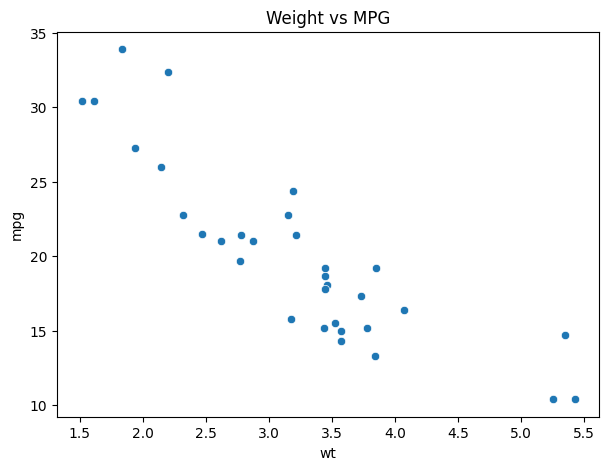

In [283]:
fig, axs = plt.subplots(figsize = (7,5))
sns.scatterplot(x=df["wt"], y=df["mpg"], ax = axs)
axs.set_xticklabels(axs.get_xticklabels())
plt.title("Weight vs MPG")

slope, intercept, r, p, stderr = stats.linregress(df["mpg"], df["wt"])
stat_table.loc[len(stat_table.index)] = ['wt', p, p < 0.001] 
stat_table.head(100)

##### 1/4 Mile Time vs MPG

,Variable,Pvalue,Stat Significant
0,cyl,2.566217e-06,True
1,gear,7.757547e-04,True
2,carb,7.013126e-03,False
3,vs,8.348661e-05,True
4,am,1.753335e-03,False
5,disp,9.380327e-10,True
6,hp,1.787835e-07,True
7,drat,1.776240e-05,True
8,wt,1.293959e-10,True
9,qsec,1.708199e-02,False


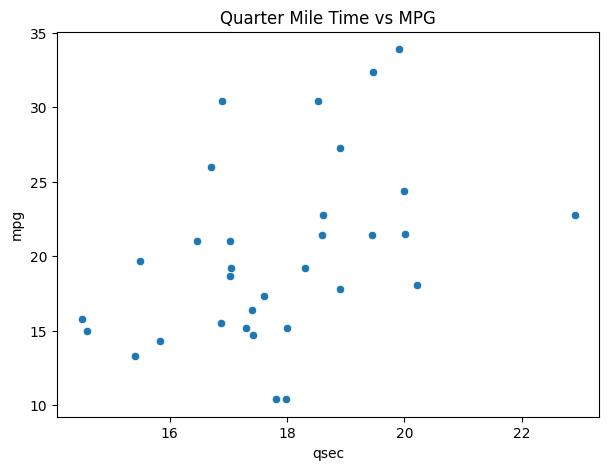

In [284]:
fig, axs = plt.subplots(figsize = (7,5))
sns.scatterplot(x=df["qsec"], y=df["mpg"], ax = axs)
axs.set_xticklabels(axs.get_xticklabels())
plt.title("Quarter Mile Time vs MPG")

slope, intercept, r, p, stderr = stats.linregress(df["mpg"], df["qsec"])
stat_table.loc[len(stat_table.index)] = ['qsec', p, p < 0.001] 
stat_table.head(100)

In [285]:
stat_table.head(100)

,Variable,Pvalue,Stat Significant
0,cyl,2.566217e-06,True
1,gear,7.757547e-04,True
2,carb,7.013126e-03,False
3,vs,8.348661e-05,True
4,am,1.753335e-03,False
5,disp,9.380327e-10,True
6,hp,1.787835e-07,True
7,drat,1.776240e-05,True
8,wt,1.293959e-10,True
9,qsec,1.708199e-02,False


From the table above, all variables except number of carbuerators, transmission type, and quarter mile time are predictive of MPG. My original guess was that weight, diplacement, and number of cylinders would be most predictive of a cars miles per gallon (MPG), while quarter mile time, transmission type, and number of gears would be least predictive. This was mostly correct since weight and displacement had the smallest P-values. However, number of gears was predictive of MPG. 


## Part 4: Creating Models
5 models will be made:
1. A null model only using the intercept
2. A model with all the variables
2. A model using only the variables that are predictive of MPG
3. A "greedy" model
4. A standardized "greedy" model

Each models accuracy metrics will be tracked in a table in the end of this section.

First lets make a function to get the sse.

In [286]:
def sse(y, yhat):
    return sum((y - yhat)**2)

### Null Model
This model will only use a a row of ones and mpg as a dependent variable.

In [287]:
intercept_df = pd.DataFrame({'Intercept': [1] * len(df['mpg'])})
null_model = sm.OLS(df["mpg"], intercept_df).fit()
null_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 08 Nov 2023   Prob (F-statistic):                nan
Time:                        19:36:30   Log-Likelihood:                -102.38
No. Observations:                  32   AIC:                             206.8
Df Residuals:                      31   BIC:                             208.2
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.0906      1.065     18.857      0.000      17.918      22.264
==============================================================================
Omnibus:                        2.714   Durbin-Watson:                   1.005
Prob(Omnibus):                  0.257   Jarque-Bera (JB):                2.241
Skew:                           0.640   Prob(JB):                        0.326
Kurtosis:                       2.799   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### All Variable Model

This model will feature all variables.

In [288]:
cols = ["cyl", "gear", "vs", "disp", "hp", "drat", "wt", "carb", "qsec", "am"]
all_vars = df[cols]

all_vars['intercept'] = 1

all_model = sm.OLS(df["mpg"], all_vars).fit()
all_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     13.93
Date:                Wed, 08 Nov 2023   Prob (F-statistic):           3.79e-07
Time:                        19:36:30   Log-Likelihood:                -69.855
No. Observations:                  32   AIC:                             161.7
Df Residuals:                      21   BIC:                             177.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cyl           -0.1114      1.045     -0.107      0.916      -2.285       2.062
gear           0.6554      1.493      0.439      0.665      -2.450       3.761
vs             0.3178      2.105      0.151      0.881      -4.059       4.694
disp           0.0133      0.018      0.747      0.463      -0.024       0.050
hp            -0.0215      0.022     -0.987      0.335      -0.067       0.024
drat           0.7871      1.635      0.481      0.635      -2.614       4.188
wt            -3.7153      1.894     -1.961      0.063      -7.655       0.224
carb          -0.1994      0.829     -0.241      0.812      -1.923       1.524
qsec           0.8210      0.731      1.123      0.274      -0.699       2.341
am             2.5202      2.057      1.225      0.234      -1.757       6.797
intercept     12.3034     18.718      0.657      0.518     -26.623      51.229
==============================================================================
Omnibus:                        1.907   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.385   Jarque-Bera (JB):                1.747
Skew:                           0.521   Prob(JB):                        0.418
Kurtosis:                       2.526   Cond. No.                     1.22e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [289]:
1- (sum((df["mpg"] - all_model.predict(all_vars))**2)) / (sum((df["mpg"] - df["mpg"].mean())**2))

0.8690157644777647

### Predictive Variable Model

This model will only feature that were considered predictive of MPG via the EDA above.


In [290]:
cols = ["cyl", "gear", "vs", "disp", "hp", "drat", "wt"]
pred_vars = df[cols]

pred_vars['intercept'] = 1

pred_model = sm.OLS(df["mpg"], pred_vars).fit()

In [291]:
pred_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     19.99
Date:                Wed, 08 Nov 2023   Prob (F-statistic):           1.42e-08
Time:                        19:36:30   Log-Likelihood:                -71.638
No. Observations:                  32   AIC:                             159.3
Df Residuals:                      24   BIC:                             171.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cyl           -0.8054      0.919     -0.876      0.389      -2.702       1.091
gear           0.6324      1.193      0.530      0.601      -1.830       3.095
vs             0.7689      1.769      0.435      0.668      -2.881       4.419
disp           0.0146      0.013      1.136      0.267      -0.012       0.041
hp            -0.0294      0.017     -1.697      0.103      -0.065       0.006
drat           0.7860      1.549      0.507      0.617      -2.411       3.983
wt            -3.6773      1.110     -3.313      0.003      -5.968      -1.387
intercept     32.3498     10.005      3.233      0.004      11.701      52.999
==============================================================================
Omnibus:                        6.824   Durbin-Watson:                   1.768
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                5.518
Skew:                           0.993   Prob(JB):                       0.0633
Kurtosis:                       3.446   Cond. No.                     6.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [292]:
mpg_avg = df["mpg"].mean()
print(mpg_avg)
1- (sum((df["mpg"] - pred_model.predict(pred_vars))**2)) / (sum((df["mpg"] - mpg_avg)**2))

20.090625000000003


0.8535697295251957

### Greedy Model

First, a model will be created for each individual variable. The SSE value of each model will be added to a sorted table. The f-value and R squared value will also be included to furhter understand the relationship between the two metrics.

In [293]:
rs = pd.DataFrame(columns = ["Variable", "SSE", "R-Squared", "F-Statistic"])


In [294]:
cyl_model = sm.OLS(df['mpg'], df['cyl']).fit()
rs.loc[len(rs.index)] = ['cyl',cyl_model.scale, cyl_model.rsquared, cyl_model.fvalue] 

disp_model = sm.OLS(df['mpg'], df['disp']).fit()
rs.loc[len(rs.index)] = ['disp',disp_model.scale, disp_model.rsquared, disp_model.fvalue] 

hp_model = sm.OLS(df['mpg'], df['hp']).fit()
rs.loc[len(rs.index)] = ['hp',hp_model.scale, hp_model.rsquared, hp_model.fvalue] 

drat_model = sm.OLS(df['mpg'], df['drat']).fit()
rs.loc[len(rs.index)] = ['drat', drat_model.scale, drat_model.rsquared, drat_model.fvalue] 

wt_model = sm.OLS(df['mpg'], df['wt']).fit()
rs.loc[len(rs.index)] = ['wt',wt_model.scale, wt_model.rsquared, wt_model.fvalue] 

qsec_model = sm.OLS(df['mpg'], df['qsec']).fit()
rs.loc[len(rs.index)] = ['qsec', qsec_model.scale, qsec_model.rsquared, qsec_model.fvalue]

vs_model = sm.OLS(df['mpg'], df['vs']).fit()
rs.loc[len(rs.index)] = ['vs',vs_model.scale, vs_model.rsquared, vs_model.fvalue] 

am_model = sm.OLS(df['mpg'], df['am']).fit()
rs.loc[len(rs.index)] = ['am',am_model.scale, am_model.rsquared, am_model.fvalue] 

gear_model = sm.OLS(df['mpg'], df['gear']).fit()
rs.loc[len(rs.index)] = ['gear',gear_model.scale, gear_model.rsquared, gear_model.fvalue] 

carb_model = sm.OLS(df['mpg'], df['carb']).fit()
rs.loc[len(rs.index)] = ['carb',carb_model.scale, carb_model.rsquared, carb_model.fvalue] 

rs = rs.sort_values(by='SSE', ascending=True)
rs.head(100)

,Variable,SSE,R-Squared,F-Statistic
3,drat,20.695017,0.954313,647.535816
8,gear,29.163753,0.935618,450.498725
5,qsec,30.216241,0.933294,433.727235
0,cyl,120.586139,0.733792,85.450449
4,wt,126.987615,0.719660,79.580154
2,hp,177.790398,0.607507,47.982387
6,vs,180.631106,0.601236,46.740265
9,carb,192.611158,0.574789,41.904966
7,am,203.468040,0.550821,38.014819
1,disp,207.818985,0.541216,36.569910


Next, starting with the base null model, each variable, starting with the lowest SSE value, will be added to the model one at a time. If the model improves with the new variable, it will be kept, if not, it will be removed. This process will continue until the model has seen each variable. The error of the model will be tracked via SSE.

A function will be made to create the greedy model so it can be used in the next model. It will take in a data frame and the table of ordered r squared values to add each variable to the model in order of lowerst SSE.

In [295]:
from statsmodels.tools.eval_measures import rmse


def make_greedy(df, rs):
    
    def sse(y, yhat):
        return sum((y - yhat)**2)
    

    #Add intercept column
    df["intercept"] = 1

    #Make base model
    model = sm.OLS(df["mpg"], df["intercept"]).fit()
    

    #Get base SSE
    best_sse = sse(df["mpg"], model.predict(df["intercept"]))
    print("intercept ", best_sse)

    #Make a list of the good variables
    good_vars = ["intercept"]

    #Itterate over each variable in df (in order of R sqaured))
    for column in rs["Variable"]:
        #Drop bad columns I dont want
        if column != "Unnamed: 0" and column != "intercept" and column != "mpg":
            #Add the current column to the list vars
            good_vars.append(column)
            #Make model
            model = sm.OLS(df["mpg"], df[good_vars]).fit()
            #Get SSE for the current model
            cur_sse = sse(df["mpg"], model.predict(df[good_vars]))
            print(column, " ", cur_sse)
            #If the SSE is higher than the previous model, remove this var from the list
            if cur_sse > best_sse:
                good_vars.remove(column)
            #If the SSE is lower than the previous model, leave the good var in the list and update the current SSE
            else:
                best_sse = cur_sse
    return good_vars, sm.OLS(df["mpg"], df[good_vars]).fit()

In [296]:
greedy_vars, greedy_model = make_greedy(df, rs)
greedy_model.summary()

intercept  1126.0471874999998
drat   603.5667335768034
gear   603.5360478006993
qsec   431.571370830563
cyl   288.85969075568295
wt   177.92734339013003
hp   170.00711547304746
vs   169.8402694082624
carb   161.62144867737422
am   151.41109711021195
disp   147.49443001665057


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     13.93
Date:                Wed, 08 Nov 2023   Prob (F-statistic):           3.79e-07
Time:                        19:36:30   Log-Likelihood:                -69.855
No. Observations:                  32   AIC:                             161.7
Df Residuals:                      21   BIC:                             177.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     12.3034     18.718      0.657      0.518     -26.623      51.229
drat           0.7871      1.635      0.481      0.635      -2.614       4.188
gear           0.6554      1.493      0.439      0.665      -2.450       3.761
qsec           0.8210      0.731      1.123      0.274      -0.699       2.341
cyl           -0.1114      1.045     -0.107      0.916      -2.285       2.062
wt            -3.7153      1.894     -1.961      0.063      -7.655       0.224
hp            -0.0215      0.022     -0.987      0.335      -0.067       0.024
vs             0.3178      2.105      0.151      0.881      -4.059       4.694
carb          -0.1994      0.829     -0.241      0.812      -1.923       1.524
am             2.5202      2.057      1.225      0.234      -1.757       6.797
disp           0.0133      0.018      0.747      0.463      -0.024       0.050
==============================================================================
Omnibus:                        1.907   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.385   Jarque-Bera (JB):                1.747
Skew:                           0.521   Prob(JB):                        0.418
Kurtosis:                       2.526   Cond. No.                     1.22e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [297]:
sse(df["mpg"], greedy_model.predict(df[greedy_vars]))

147.49443001665057

### Standardized Greedy Model

The sklearn api will be used to standardize the data. Note that the names are removed from the data to avoid standarsization issues. A greedy model will be made and fit on the standardized data. 

In [298]:
from sklearn.preprocessing import StandardScaler

X = df.drop(['Unnamed: 0', "mpg"], axis=1)
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std = pd.DataFrame(X_std, columns=X.columns)
X_std["mpg"] = df["mpg"]
#X_std["intercept"] = df["intercept"]

std_greedy_vars, std_greedy_model = make_greedy(X_std, rs)
std_greedy_model.summary()

intercept  1126.0471874999998
drat   603.5667335768031
gear   603.5360478006993
qsec   431.5713708305631
cyl   288.85969075568295
wt   177.92734339013003
hp   170.00711547304758
vs   169.8402694082625
carb   161.6214486773741
am   151.41109711021193
disp   147.49443001665063


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     13.93
Date:                Wed, 08 Nov 2023   Prob (F-statistic):           3.79e-07
Time:                        19:36:30   Log-Likelihood:                -69.855
No. Observations:                  32   AIC:                             161.7
Df Residuals:                      21   BIC:                             177.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     20.0906      0.468     42.884      0.000      19.116      21.065
drat           0.4142      0.861      0.481      0.635      -1.376       2.204
gear           0.4760      1.084      0.439      0.665      -1.779       2.731
qsec           1.4440      1.285      1.123      0.274      -1.229       4.117
cyl           -0.1959      1.837     -0.107      0.916      -4.016       3.624
wt            -3.5780      1.824     -1.961      0.063      -7.372       0.216
hp            -1.4497      1.469     -0.987      0.335      -4.505       1.605
vs             0.1576      1.044      0.151      0.881      -2.013       2.329
carb          -0.3170      1.318     -0.241      0.812      -3.057       2.423
am             1.2378      1.010      1.225      0.234      -0.863       3.338
disp           1.6267      2.178      0.747      0.463      -2.903       6.157
==============================================================================
Omnibus:                        1.907   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.385   Jarque-Bera (JB):                1.747
Skew:                           0.521   Prob(JB):                        0.418
Kurtosis:                       2.526   Cond. No.                         15.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [299]:
model_table = pd.DataFrame(columns = ["Model", "SSE", "R-Squared", "F-Statistic"])


model_table.loc[len(model_table.index)] ="Null", sse(df["mpg"], null_model.predict(df["intercept"])), null_model.rsquared, null_model.fvalue
model_table.loc[len(model_table.index)] = "All", sse(df["mpg"], all_model.predict(all_vars)), all_model.rsquared, all_model.fvalue
model_table.loc[len(model_table.index)] = "Pred", sse(df["mpg"], pred_model.predict(pred_vars)), pred_model.rsquared, pred_model.fvalue
model_table.loc[len(model_table.index)] = "Greedy", sse(df["mpg"], greedy_model.predict(df[greedy_vars])), greedy_model.rsquared, greedy_model.fvalue
model_table.loc[len(model_table.index)] = "Std Greedy", sse(df["mpg"], std_greedy_model.predict(df[std_greedy_vars])), std_greedy_model.rsquared, std_greedy_model.fvalue
model_table = model_table.sort_values(by = "SSE")
model_table.head(100)

,Model,SSE,R-Squared,F-Statistic
3,Greedy,1.474944e+02,0.869016,13.932464
1,All,1.474944e+02,0.869016,13.932464
2,Pred,1.648874e+02,0.853570,19.985791
0,Null,1.126047e+03,0.000000,NaN
4,Std Greedy,1.602944e+06,0.869016,13.932464


Looking at the table above, we can see that the greedy model chose to keep all the variables, so it essentially made the exact model as that with all the variables. So, it makes sense that those two models have the exact same metrics

## Part 5: Evaluating Models

A table will be made to compare the RMSE of each model.

In [300]:
rmse_table = pd.DataFrame(columns = ["Model", "RMSE"])

rmse_table.loc[len(rmse_table.index)] = "Pred", rmse(df["mpg"], pred_model.predict(pred_vars))
rmse_table.loc[len(rmse_table.index)] = "Null", rmse(df["mpg"], null_model.predict(df["intercept"]))
rmse_table.loc[len(rmse_table.index)] = "All", rmse(df["mpg"], all_model.predict(all_vars))
rmse_table.loc[len(rmse_table.index)] = "Greedy", rmse(df["mpg"], greedy_model.predict(df[greedy_vars]))
rmse_table.loc[len(rmse_table.index)] = "Std Greedy", rmse(X_std["mpg"], greedy_model.predict(df[std_greedy_vars]))

rmse_table = rmse_table.sort_values(by = "RMSE")
rmse_table.head(100)


,Model,RMSE
3,Greedy,2.146905
4,Std Greedy,2.146905
2,All,2.146905
0,Pred,2.269963
1,Null,5.932030


Again, the all variable model and the greedy model are expected to have the same metrics since they are the exact same model. However, it can be seen that the standardized greedy model has also joined the party in regards to RMSE. Since the rsquared values of the greedy and standard greedy models are the same (because the data ratios and weights are the same), it makes sense that the RMSE values are the same as well. However, it can not be said that they have the same accuracies since the standard greedy model has a slower SSE than the greedy model.

So, it can be said that the greedy (all variable) model is more accuarate than the predictive, null and stardard greedy models.

Now, lets look at a plot of the greedy model's predictions vs the actual mpg values.

Text(0.5, 1.0, 'Actual vs Predicted MPG')

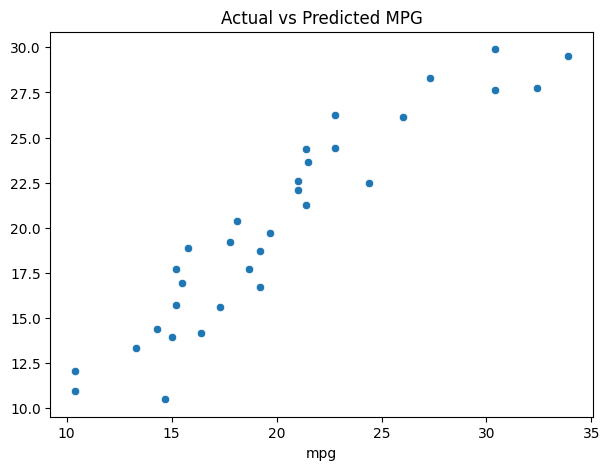

In [301]:
fig, axs = plt.subplots(figsize = (7,5))
sns.scatterplot(x=df["mpg"], y=greedy_model.predict(df[greedy_vars]), ax = axs)
axs.set_xticklabels(axs.get_xticklabels())
plt.title("Actual vs Predicted MPG")

From this plot, we can see that the predictions were fairly accurate since the values follow a postivie linear trend and the data is evenly distributed evenly above and below the hypothetical best fit line.

Next, we will make a plot of the residuals vs the predicted values to ensure that a linear model is apporpriate for this data.

<Figure size 1400x800 with 0 Axes>

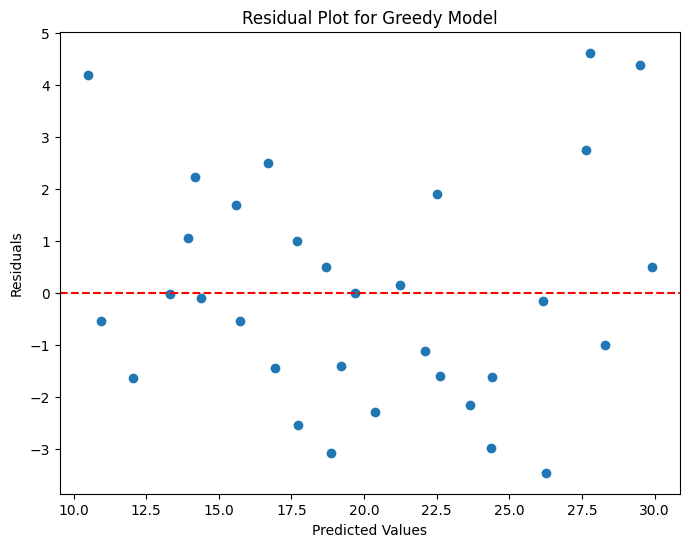

In [302]:
fig = plt.figure(figsize=(14, 8))

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(greedy_model.predict(df[greedy_vars]), greedy_model.resid)
ax.axhline(y=0, color='r', linestyle='--')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Residuals')
ax.set_title('Residual Plot for Greedy Model')
plt.show()


This risiudal plot shows that there is a zero mean within the residuals since there is an even spread of points above and below the zero line with no distinct pattern among the residuals. Additionally, the absence of a cone shape shows that the variance of the residuals is constant. In the EDA section of this lab, we also determined that the dependent variable and indipendent variables follow a linear relationship.
Looking at the Jarque-Bera score for the greedy model, it is above .05, so we reject the hypothesis that the data is **not** normal (the data is normal).  

Given all these critera, it can be said that this data and model meet the assumptions of the BLUE theorem, meaning that a linear regression model is the best estimator and or predictor of the data.

Lets break down this model even more and evaluate how it treated each variable.

In [303]:
greedy_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     13.93
Date:                Wed, 08 Nov 2023   Prob (F-statistic):           3.79e-07
Time:                        19:36:31   Log-Likelihood:                -69.855
No. Observations:                  32   AIC:                             161.7
Df Residuals:                      21   BIC:                             177.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     12.3034     18.718      0.657      0.518     -26.623      51.229
drat           0.7871      1.635      0.481      0.635      -2.614       4.188
gear           0.6554      1.493      0.439      0.665      -2.450       3.761
qsec           0.8210      0.731      1.123      0.274      -0.699       2.341
cyl           -0.1114      1.045     -0.107      0.916      -2.285       2.062
wt            -3.7153      1.894     -1.961      0.063      -7.655       0.224
hp            -0.0215      0.022     -0.987      0.335      -0.067       0.024
vs             0.3178      2.105      0.151      0.881      -4.059       4.694
carb          -0.1994      0.829     -0.241      0.812      -1.923       1.524
am             2.5202      2.057      1.225      0.234      -1.757       6.797
disp           0.0133      0.018      0.747      0.463      -0.024       0.050
==============================================================================
Omnibus:                        1.907   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.385   Jarque-Bera (JB):                1.747
Skew:                           0.521   Prob(JB):                        0.418
Kurtosis:                       2.526   Cond. No.                     1.22e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the indidividual variable p-values above, we can see that the model treated weight, qsec, and trasmission with the most significance. However, it is important to note that none of these p-values are below .05, the accepeted threshold. Yet, this is common for models with small deminions such as this one. Recall my original guesses and analysis after the EDA. I said that weight, displacememt, and number of cylinders would be most predictive of MPG. The EDA of this program concluded that weight, displacement, and number of gears were most predictive. So why do these two analyses differ? Well, the EDA was only looking at the relationship between each variable and MPG, while the model is looking at the relationship between each variable and MPG while also taking into account the relationship between each variable and the other variables. So, the model is able to see that weight, displacement, and number of gears are the most predictive of MPG when taking into account the other variables.

## Conclusion
This lab aimed to make a linear regression model to predict the MPG of a car based on its features. The model was able to predict the MPG of a car with an RMSE of 2.15. Additionally, we were able to confirm that this data was best represented in a linear model where all the available data was used. 

If this lab were to be continued, obtaining the car brand, model, and year from the first column of the data could help make the model stronger. Additionally, more data would be helpful. This data set only had 32 rows, so adding more data would help the model generalize better.